curveOrder= 1
nv= 34  nedge= 106  nfacet= 118  ne= 44


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

enter iccg_solve
Dof= 601    Nonzeros= 23616
shift parameter= 1.0
minimum residual= 8.273448852118897e-09  at iteraions:  35


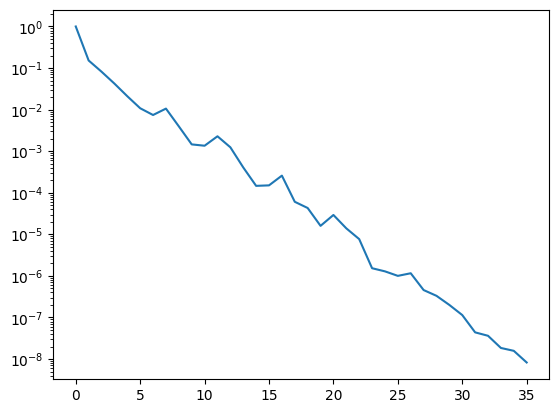

ICCG calculation time (sec): 0.0041470000287517905
経過時間: 0.5035 秒  
center magnetic field =  ((1.673742742296259e-15+5.885975524098755e-16j), (4.754095030280994e-15-1.3385174972785054e-15j), (0.051206725362613406+0.6681834081910668j))   
 Magnetic energy in conductor= (19330.61804125062-13027.614800513322j)  Joule loss=  (12726.688420149214+26093.05095689647j)
**** B field (real)****


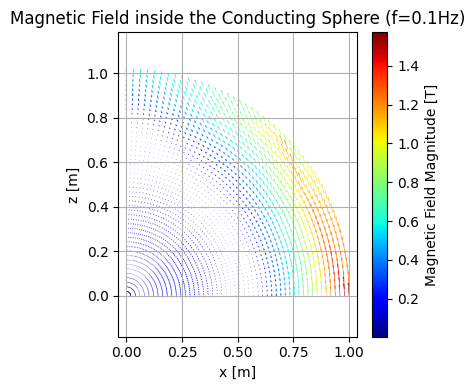

**** B field (imag)****


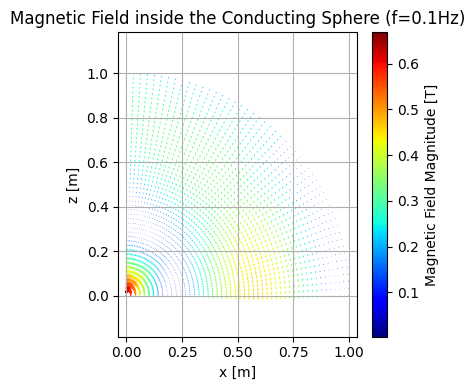

**** J field (real)****


C:\EMSolution\EMSolpy5\EMPY_Analysis\EddyCurrent\..\Static\Static_Method.py:188: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(X, Z, Jphi, cmap='coolwarm')


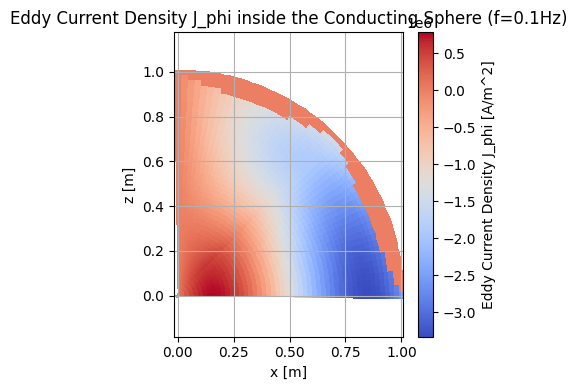

**** J field (imag)****


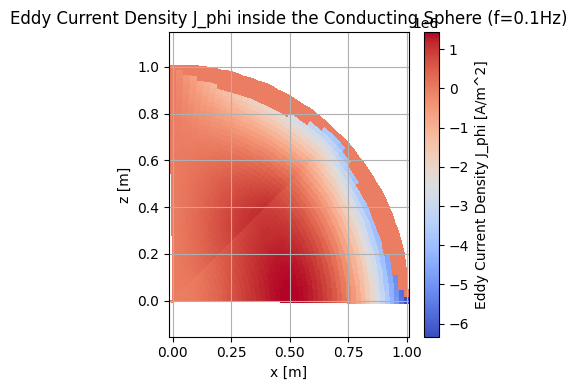

max(eta_t)= 970.6109491606522   max(eta_j)= 43.433733704425265
 maxerr =  982.3821345907942 66.48024331645581 11.789930357401015
ndof= 905  maxerr =  982.3821345907942


In [1]:
from ngsolve import *
from netgen.occ import *
from ngsolve.webgui import Draw
from netgen.webgui import Draw as DrawGeo  
sys.path.append(r'..\Static') 
from Omega_ReducedOmega import Omega_ReducedOmega_Method
from A_ReducedOmega import A_ReducedOmega_Method
from A_ReducedA import A_ReducedA_Method
from A_Phi_ReducedA import A_Phi_ReducedA_Method
sys.path.append(r'..\bin\Release') 
from EMPY_Field import *
sys.path.append(r'..\model')
from SphereMesh import SphereMesh
from HoleSphereMesh import HoleSphereMesh
from BathPlateModel import BathPlateModel
from Team7Model import Team7Model

#coil=UNIF(0,0,1,0)
#model=CubeMesh(msize=meshsize.coarse, curveOrder=3, rKelvin=5)
#model=SphereMesh(mur=1, sigma=1, msize=meshsize.fine, curveOrder=3, rKelvin=0)
model=SphereMesh(mur=1, sigma=5.e7, msize=meshsize.very_coarse, curveOrder=1, rKelvin=2)
#model=BathPlateModel(holes=2, outerBox="sphere", boxx=0.2, boxy=0.2, boxz=0.2,  msize=meshsize.very_coarse, sigma=0.3278e8, rKelvin=0.15)
#model=Team7Model()
mesh=model.mesh
Draw(mesh)
#DrawGeo(model.geo)

feOrder=3
#cal=Omega_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0", Kelvin="on")
#cal=A_Phi_ReducedA_Method(model, jomega=False)
cal=A_Phi_ReducedA_Method(model, jomega=True, freq=0.1)
#cal=A_ReducedA_Method(model)
cal.Calc( feOrder=feOrder, Kelvin="on", boundaryCD="Bn0", regularization=False, tol=1.e-8)
cal.CalcResult(model, plotBFieldonLine=False, drawFields=True, pltBField=True)
#maxerror, error=cal.CalcError()
maxerror, error=cal.CalcError()


very_coarse
Regularization=False
Magnetic energy in conductor= (29152.977730838058-20618.858657114157j)  Joule loss=  (15048.519194226223+33252.89982907082j)
Regulatization=True
Magnetic energy in conductor=(6949.7358853534-4111.396555118331j)  Joule loss=  (1896.2770803032388+6074.711924761992j)
corase
Regularization=False
 Magnetic energy in conductor= (26146.590373414005-18569.488874054114j)  Joule loss=  (16802.860226759993+31796.38000918764j)
Regulatization=True
  Magnetic energy in conductor= (4329.455960317317-3072.477991594903j)  Joule loss=  (2751.9943750220145+5257.569896596479j)

In [2]:
iter=0
#for iter in range(6):
while True:
    iter=iter+1
    print("Adaptive iteration: ",iter) 
    maxerror, error=cal.CalcError()
    cal.Refine(maxerror, error)
    Draw(mesh)
    #cal=A_Phi_ReducedA_Method(model, jomega=True, freq=50)
    cal=A_Phi_ReducedA_Method(model, jomega=True, freq=0.1)
    rt=cal.Calc(feOrder=feOrder, Kelvin="on", boundaryCD="Bn0", regularization=False, tol=1.e-8)
    if rt==0: break
    cal.CalcResult(model, plotBFieldonLine=False, drawFields=True, pltBField=True)
    #cal=Omega_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0")


Adaptive iteration:  1
max(eta_t)= 970.6109491606522   max(eta_j)= 43.433733704425265
 maxerr =  982.3821345907942 66.48024331645581 11.789930357401015
ndof= 905  maxerr =  982.3821345907942


ImportError: cannot import name 'ngsglobals' from 'netgen.meshing' (C:\Users\kamea\AppData\Roaming\Python\Python310\site-packages\netgen\meshing.py)

In [3]:
import ngsolve as ngs
print(ngs.__version__)



6.2.2402
